# EML

In [1]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # sklearn中的 随机森岭回归 梯度提升回归
# from xgboost import XGBRFRegressor, XGBRegressor # xgboost中提供的另外的两种梯度提升回归方法
from sklearn.model_selection import train_test_split
# https://xgboost.readthedocs.io/en/stable/tutorials/model.html
from sklearn.model_selection import cross_validate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import time

plt.rcParams['font.sans-serif']=['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.family'] = ['Microsoft YaHei'] 

import warnings
warnings.filterwarnings("ignore") 

In [2]:
idata=pd.read_csv('all_features.csv', index_col='时间') 

In [5]:
# pandas DataFrame
X = idata[[i for i in idata.columns if 'O₃' not in i]] # features
print(X.shape)
y = idata[[i for i in idata.columns if 'O₃' in i]] # O3 label
print(y.shape)

feature_columns=X.columns
target_columns=y.columns

(18989, 26)
(18989, 1)


In [6]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3) # 数据集分割 默认test占比0.25
X_train_index=X_train.index
y_train_index=y_train.index
X_test_index=X_test.index
y_test_index=y_test.index

In [9]:
# scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler1 = StandardScaler()
X_scaler = scaler1.fit(X)
X_train = X_scaler.transform(X_train) # mean var
X_test = X_scaler.transform(X_test)
scaler2 = StandardScaler()
y_scaler = scaler2.fit(y)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [10]:
X_train=pd.DataFrame(X_train,columns=feature_columns)
X_train.index=X_train_index
y_train=pd.DataFrame(y_train,columns=target_columns)
y_train.index=y_train_index
X_test=pd.DataFrame(X_test,columns=feature_columns)
X_test.index=X_test_index
y_test=pd.DataFrame(y_test,columns=target_columns)
y_test.index=y_test_index

In [11]:
regrRF = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=20, oob_score=True)
regrGB = GradientBoostingRegressor(random_state=0, n_estimators=100, learning_rate=0.1, max_depth=8) 

In [12]:
from sklearn.neural_network import MLPRegressor
regrMLP = MLPRegressor(random_state=20)
print('MLP',regrMLP.score(X_test, y_test))

MLP 0.8380211374781228


In [14]:
# pandas DataFrame
regrRF.fit(X_train, y_train)
regrGB.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, random_state=0)

In [15]:
print('RF',regrRF.score(X_test, y_test))
print('GB',regrGB.score(X_test, y_test))
# print('XGBF',regrXGBF.score(X_test, y_test))
# print('XGB',regrXGB.score(X_test, y_test))

RF 0.8586153787655904
GB 0.8634993433474032


In [16]:
# cross-validation
start_time = time.time()
scoring = ['max_error', 'neg_mean_absolute_error', 'r2']
scoresRF = cross_validate(regrRF, X, y, scoring=scoring,cv=10, return_train_score=False, verbose=0)
scoresGB = cross_validate(regrGB, X, y, scoring=scoring,cv=10, return_train_score=False, verbose=0)
scoresMLP = cross_validate(regrMLP, X, y, scoring=scoring,cv=10, return_train_score=False, verbose=0)
elapsed_time = time.time() - start_time
print(elapsed_time,'s')

499.2002012729645 s


In [17]:
print('Random Foresr:'
      ,"R2={:.2f}±{:.2f}".format(np.mean(scoresRF["test_r2"]),np.std(scoresRF["test_r2"]))
      ,'\t'
      ,"MAE={:.2f}±{:.2f}".format(-np.mean(scoresRF["test_neg_mean_absolute_error"]),np.std(scoresRF["test_neg_mean_absolute_error"])))
print('Gradient Boost:'
      ,"R2={:.2f}±{:.2f}".format(np.mean(scoresGB["test_r2"]),np.std(scoresGB["test_r2"]))
      ,'\t'
      ,"MAE={:.2f}±{:.2f}".format(-np.mean(scoresGB["test_neg_mean_absolute_error"]),np.std(scoresGB["test_neg_mean_absolute_error"])))
print('MLPRegressor:'
      ,"R2={:.2f}±{:.2f}".format(np.mean(scoresMLP["test_r2"]),np.std(scoresMLP["test_r2"]))
      ,'\t'
      ,"MAE={:.2f}±{:.2f}".format(-np.mean(scoresMLP["test_neg_mean_absolute_error"]),np.std(scoresMLP["test_neg_mean_absolute_error"])))

Random Foresr: R2=0.84±0.05 	 MAE=4.86±0.18
Gradient Boost: R2=0.85±0.05 	 MAE=4.66±0.19
MLPRegressor: R2=0.67±0.10 	 MAE=8.88±1.26


In [18]:
y_RF = regrRF.predict(X_test)
y_GB = regrGB.predict(X_test)
y_MLP= regrMLP.predict(X_test)
# y_XGBF = regrXGBF.predict(X_test)
# y_XGB = regrXGB.predict(X_test)
Y = [y_RF
     , y_GB
     ,y_MLP
     # , y_XGBF
     # , y_XGB
    ]
Ymodel = ['RF'
          , 'GB'
          , 'MLP'
          # , 'XGBF'
          # , 'XGB'
         ]

In [19]:
RF_test = y_scaler.inverse_transform (y_test)
GB_test = y_scaler.inverse_transform (y_test)
MLP_test = y_scaler.inverse_transform (y_test)

In [20]:
RF_predict = y_scaler.inverse_transform (y_RF.reshape(-1,1))
GB_predict = y_scaler.inverse_transform (y_GB.reshape(-1,1))
MLP_predict = y_scaler.inverse_transform (y_MLP.reshape(-1,1))

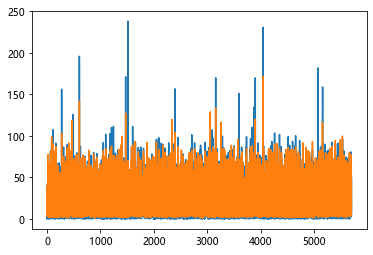

In [21]:
plt.plot(RF_test)
plt.plot(RF_predict)

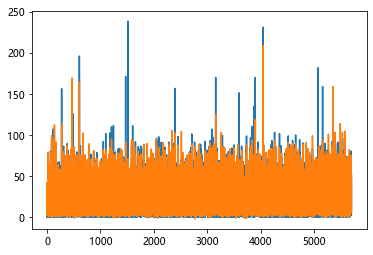

In [22]:
plt.plot(GB_test)
plt.plot(GB_predict)

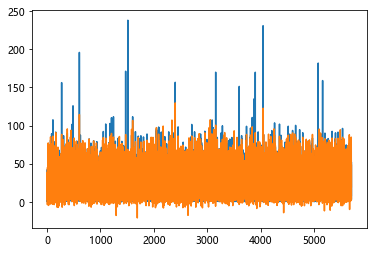

In [23]:
plt.plot(MLP_test)
plt.plot(MLP_predict)

## Stacking

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import LogisticRegression

In [26]:
estimators = [("Random Forest", RandomForestRegressor(random_state=0, n_estimators=100, max_depth=20, oob_score=True)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=0, n_estimators=100, learning_rate=0.1, max_depth=8)),
    ("Multi-layer Perceptron", MLPRegressor(random_state=20))]

In [27]:
final_estimator = RidgeCV()
reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

In [28]:
reg.fit(X_train, y_train)
print('reg',reg.score(X_test, y_test))

reg 0.873363220173716


In [29]:
y_reg = reg.predict(X_test)
Y = [y_reg
    ]
Ymodel = ['REG'
          # , 'XGBF'
          # , 'XGB'
         ]

In [30]:
reg_test = y_scaler.inverse_transform (y_test)

In [31]:
reg_predict = y_scaler.inverse_transform (y_reg.reshape(-1,1))

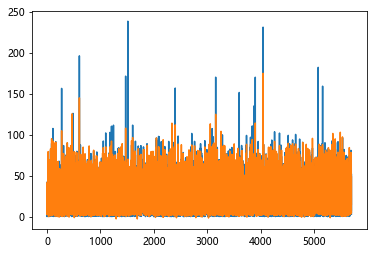

In [33]:
plt.plot(reg_test)
plt.plot(reg_predict)

In [34]:
pd.DataFrame(reg_test).to_excel('test.xlsx')
pd.DataFrame(reg_predict).to_excel('predict.xlsx')

## SHAP-individual model

In [ ]:
import shap
explainer = shap.TreeExplainer(regrGB)
shap_values = explainer.shap_values(X_test)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test, max_display=28, show=False)

In [ ]:
import shap
explainer = shap.TreeExplainer(regrRF)
shap_values = explainer.shap_values(X_test)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test, max_display=28, show=False)

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=28, show=True)

In [ ]:
import shap
explainer = shap.KernelExplainer(model=regrMLP.predict, data=X_train, link="identity")
shap_values = explainer.shap_values(X_train)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
import shap
explainer = shap.KernelExplainer(model=regrMLP.predict, data=X_train, link="identity")
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=28)

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test, max_display=28, show=False)

# Grid search

In [ ]:
regrXGB.set_params

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn import metrics

In [ ]:
param_test1 = {'n_estimators':range(20,81,10)
               , 'learning_rate':np.linspace(0.1, 1, 10).tolist()
               , 'max_depth':range(3,14,2)
              }

In [ ]:
param_test1 = {'n_estimators':range(100,1000,100)
              }

In [ ]:
gsearch1 = GridSearchCV(estimator = XGBRegressor(), 
                       param_grid = param_test1, scoring='r2')
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
gsearch1.cv_results_.keys()

In [ ]:
gsearch1.cv_results_['params']

In [ ]:
gsearch1.cv_results_['mean_test_score']

# Curve

In [128]:
data_high=pd.read_csv('all_features_high.csv', index_col='时间') 
X_high = data_high.drop('O₃-臭氧(μg/m³)', axis=1)
y_high = pd.DataFrame(data_high['O₃-臭氧(μg/m³)'])

In [130]:
X_high_scaler = X_scaler.transform(X_high) # mean var
y_high_scaler = y_scaler.transform(pd.DataFrame(y_high))

In [131]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
太阳总辐射,18989.0,165.512091,256.629485,0.000000,0.000000,8.356000,271.625000,1242.908000
芳香烃类总值,18989.0,2.514191,3.324582,0.000000,0.114000,1.465000,3.503000,28.918000
卤代总值,18989.0,3.720557,5.645028,0.000000,0.747000,2.202000,4.108000,62.761000
烷烃类总值,18989.0,10.712790,7.201102,0.000000,5.391000,9.699000,15.054000,52.686000
烯烃总值,18989.0,3.307686,2.914183,0.000000,1.224000,2.364000,4.825000,20.404000
炔烃,18989.0,2.058748,1.776158,0.014816,0.799000,1.451000,2.660000,9.763000
含氧有机物总值,18989.0,11.679051,11.439589,0.000000,1.578000,9.225000,17.104000,84.994000
TVOC,18989.0,33.993023,24.710410,0.609385,16.177000,28.850000,47.438000,176.580000
压强,18989.0,84.323784,0.563248,82.600000,83.900000,84.300000,84.714000,86.100000
湿度(%),18989.0,43.937442,19.766148,1.058000,28.293000,43.473000,58.703000,99.000000


In [132]:
y.describe().T

,count,mean,std,min,25%,50%,75%,max
O₃-臭氧(μg/m³),18989.0,27.616544,23.572912,0.000933,6.55134,24.718963,41.883678,406.416867


In [133]:
X_high.describe(percentiles=[0.1,0.2,0.5,0.75,0.9]).T

,count,mean,std,min,10%,20%,50%,75%,90%,max
太阳总辐射,1291.0,203.352995,312.422667,0.000000,0.000000,0.000000,19.940000,328.506000,806.110000,1023.690000
芳香烃类总值,1291.0,2.404047,2.673232,0.000000,0.000000,0.000000,1.670000,3.303500,5.797000,18.607000
卤代总值,1291.0,4.370629,5.695733,0.000000,0.000000,0.000000,2.904000,5.415000,9.445000,49.672000
烷烃类总值,1291.0,10.248368,6.396541,0.000000,2.875000,4.937000,9.192000,14.225500,19.155000,41.217000
烯烃总值,1291.0,3.092401,2.562414,0.000000,0.584000,1.070000,2.391000,4.444000,6.769000,14.788000
炔烃,1291.0,1.368930,1.053875,0.014816,0.362000,0.609385,1.118000,1.826500,2.629000,9.602000
含氧有机物总值,1291.0,11.910587,12.890716,0.000000,0.000000,0.000000,8.493000,16.498000,31.658000,72.719000
TVOC,1291.0,33.394963,25.223409,0.609385,6.314921,11.864000,27.496723,45.689000,69.647000,137.939000
压强,1291.0,83.896895,0.456039,82.924000,83.400000,83.502000,83.802000,84.100000,84.500000,85.400000
湿度(%),1291.0,39.946067,19.655485,3.953000,15.252000,20.036000,39.037000,53.827500,67.488000,89.665000


In [134]:
y_high.describe(percentiles=[0.1,0.2,0.5,0.75,0.9]).T

,count,mean,std,min,10%,20%,50%,75%,90%,max
O₃-臭氧(μg/m³),1291.0,41.971675,41.619706,0.021934,1.582066,6.054319,30.199258,65.636135,91.589016,406.416867


In [135]:
all_var = ['太阳总辐射', 
           '芳香烃类总值',
           '卤代总值',
           '烷烃类总值',
           '烯烃总值',
           '炔烃',
           '含氧有机物总值',
           'TVOC',
           '压强',
           '湿度(%)',
           '风速(m/s)',
           '风向(°)', 
           '温度', 
           'SO₂-二氧化硫(μg/m³)',
           'NOx-氮氧化合物(μg/m³)',
           'NO-一氧化氮(μg/m³)',
           'NO₂-二氧化氮(μg/m³)',
           'CO-一氧化碳(mg/m³)', 
           'PM₁₀(μg/m³)',
           'PM₂.₅(ug/m³)',
           'PM₁(μg/m³)',
           'TSP(μg/m³)',
           '能见度(m)',
           '光学OC(μg/m³)',
           '光学EC(μg/m³)',
           '总碳TC(μg/m³)']

fit_varX = 'TVOC'
fit_varX_range = {'min':0, 'max':100, 'step':1}
fit_varY = 'NOx-氮氧化合物(μg/m³)'
fit_varY_range = {'min':0, 'max':500, 'step':1}

In [136]:
# 使用标准化数据
fix_value_sta = {'太阳总辐射':0.427,
'芳香烃类总值':0.494,
'卤代总值':0.123,
'烷烃类总值':0.560,
'烯烃总值':0.357,
'炔烃':0.467,
'含氧有机物总值':0.512,
'TVOC':0.528,
'压强':0.678,
'湿度(%)':0.371,
'风速(m/s)':0.619,
'风向(°)':0.708,
'温度':0.692,
'SO₂-二氧化硫(μg/m³)':0.239,
'NOx-氮氧化合物(μg/m³)':0.536,
'NO-一氧化氮(μg/m³)':0.115,
'NO₂-二氧化氮(μg/m³)':0.762,
'CO-一氧化碳(mg/m³)':0.398,
'PM₁₀(μg/m³)':0.270,
'PM₂.₅(ug/m³)':0.206,
'PM₁(μg/m³)':0.376,
'TSP(μg/m³)':0.332,
'能见度(m)':0.736,
'光学OC(μg/m³)':0.437,
'光学EC(μg/m³)':0.590,
'总碳TC(μg/m³)':0.542}

In [137]:
# 原始数据
fix_value_raw={'太阳总辐射':233.516733333333,
'芳香烃类总值':2.085,
'卤代总值':1.882,
'烷烃类总值':14.2726666666667,
'烯烃总值':3.5158,
'炔烃':3.35399568846667,
'含氧有机物总值':12.4876,
'TVOC':37.5970623553333,
'压强':84.295,
'湿度(%)':32.8153333333333,
'风速(m/s)':0.599533333333333,
'风向(°)':171.6028,
'温度':7.6484,
'SO₂-二氧化硫(μg/m³)':20.7700666666667,
'NOx-氮氧化合物(μg/m³)':130.017866666667,
'NO-一氧化氮(μg/m³)':49.9685333333333,
'NO₂-二氧化氮(μg/m³)':53.4448666666667,
'CO-一氧化碳(mg/m³)':2.3214,
'PM₁₀(μg/m³)':741.426733333333,
'PM₂.₅(ug/m³)':217.637533333333,
'PM₁(μg/m³)':35.8539333333333,
'TSP(μg/m³)':895.9098,
'能见度(m)':8196.2314,
'光学OC(μg/m³)':7.378761245,
'光学EC(μg/m³)':1.551947175,
'总碳TC(μg/m³)':8.9307072024}

In [138]:
def DLpredictArray(EsembleMethod, # 集成模型方法
                   all_var, # 固定变量 可选均值、中位数
                   fix_value_method, # 字符型 mean 或 media 或 手动赋值变量名
                   fit_varX, # 拟合变量 控制曲线中的 X
                   fit_varX_range, # 字典格式如： {'min':0, 'max':50, 'step':5}
                   fit_varY, # 拟合变量 控制曲线中的 Y
                   fit_varY_range # 字典格式如： {'min':0, 'max':50, 'step':5}
                  ):
    
    # 构造输入数据格式    
    input_control = pd.DataFrame(columns=all_var)
    
    # 构建meshgrid用于控制曲线绘图
    fit_varX_value = np.arange(fit_varX_range['min'], fit_varX_range['max']+1, fit_varX_range['step']) # 控制曲线X轴范围
    fit_varY_value = np.arange(fit_varY_range['min'], fit_varY_range['max']+1, fit_varY_range['step']) # 控制曲线Y轴范围
    meshgrid_X, meshgrid_Y = np.meshgrid(fit_varX_value,fit_varY_value) 
    #meshgrid_Y = np.flip(meshgrid_Y)
    print(meshgrid_X)
    print(meshgrid_Y)

    # 展开meshgrid数据用于EsembleMethod拟合O3
    # 拟合数据
    input_X = meshgrid_X.reshape(-1).tolist()
    input_Y = meshgrid_Y.reshape(-1).tolist()
   
    # 固定数据
    # 固定变量取值方法    
    if fix_value_method=='mean':
        fix_value = dict(X_high.mean())
    elif fix_value_method=='media':
        fix_value = dict(X_high.quantile())
    elif isinstance(fix_value_method,dict):
        if list(fix_value_method.keys())==all_var:
            fix_value = fix_value_method
        else:
            print("变量没有全部被指定！退出计算，请修改后重新运行！")
            quit()
    else:
        pass
    print(fix_value)
    # 构建输入数据 DataFrame
    len_fix_var = len(input_X) # len(input_X)=len(input_Y)
    
    for i in fix_value.keys():
        input_control[i]=[fix_value[i]]*len_fix_var
        
    # 替换拟合数据 X,Y
    input_control[fit_varX]=input_X
    input_control[fit_varY]=input_Y
    
    
   
    value_O3 = EsembleMethod.predict(X_scaler.transform(input_control)) # 标准化输入数据
    value_O3 = y_scaler.inverse_transform(value_O3.reshape(-1,1)) # 输出结果逆标准化
    value_O3Array = value_O3.reshape(meshgrid_X.shape) # 构建输出 meshgrid

    return value_O3Array, meshgrid_X, meshgrid_Y
    
   
   # value_O3_inverse_std = y_scaler.inverse_transform(value_O3)
   # print(value_O3_inverse_std)
    #value_O3Array = value_O3.reshape(meshgrid_X.shape)
   # value_O3Array = value_O3_inverse_std.reshape(meshgrid_X.shape)
   # return value_O3Array, meshgrid_X, meshgrid_Y, value_O3_inverse_std, meshgrid_X_draw, meshgrid_Y_draw
    

In [139]:
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
plt.figure(figsize=(100,50))
 
font = {'family': 'Times New Roman','weight' : 'bold','size':14,}
def plotarray(O3_array, meshgrid_X, meshgrid_Y, Xlabel, Ylabel, Zlabel):
    plt.close()
    ctf=plt.contourf(meshgrid_X, meshgrid_Y, O3_array, cmap=cm.RdYlBu_r, levels=np.linspace(10,40,25))#, levels=20)
    ct=plt.contour(meshgrid_X, meshgrid_Y, O3_array, colors='k', levels=20)
    x_major_locator=MultipleLocator(5)#(meshgrid_X.max()//10)
    #把x轴的刻度间隔设置为1，并存在变量里
    y_major_locator=MultipleLocator(meshgrid_Y.max()//10)
    #把y轴的刻度间隔设置为10，并存在变量里
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为1的倍数
    ax.yaxis.set_major_locator(y_major_locator)
    #把y轴的主刻度设置为10的倍数
    plt.xlim(meshgrid_X.min(), meshgrid_X.max())
    #把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
    plt.ylim(meshgrid_Y.min(), meshgrid_Y.max())
    #把y轴的刻度范围设置为-5到110，同理，-5不会标出来，但是能看到一点空白
    plt.yticks(fontproperties='Times New Roman', size=14,weight='bold')#设置大小及加粗
    plt.xticks(fontproperties='Times New Roman', size=14,weight='bold')
    
    plt.xlabel(Xlabel, font)
    plt.ylabel(Ylabel, font)
    plt.title(Zlabel, font)
    cb=plt.colorbar(ctf)
    cb.ax.tick_params(labelsize=14)
    labels = cb.ax.yaxis.get_ticklabels()
    [label.set_fontname('Times New Roman') for label in labels]
    [label.set_fontweight('bold') for label in labels]
    plt.clabel(ct, inline=True, fontsize=10)
    plt.show()

<Figure size 7200x3600 with 0 Axes>

In [149]:
O3, meshgrid_X, meshgrid_Y = DLpredictArray(EsembleMethod=reg, # 集成模型方法
                   all_var=all_var, # 固定变量 可选均值、中位数
                   fix_value_method='mean', # 字符型 'mean' 或 'media',fix_value_raw,    
                   fit_varX='TVOC', # 拟合变量 控制曲线中的 X
                   fit_varX_range={'min':6, 'max':70, 'step':1}, # 字典格式如： {'min':0, 'max':50, 'step':5}
                   fit_varY='NOx-氮氧化合物(μg/m³)', # 拟合变量 控制曲线中的 Y
                   fit_varY_range={'min':11, 'max':75, 'step':1} # 字典格式如：{'min':0, 'max':50, 'step':5}
                   )

[[ 6  7  8 ... 68 69 70]
 [ 6  7  8 ... 68 69 70]
 [ 6  7  8 ... 68 69 70]
 ...
 [ 6  7  8 ... 68 69 70]
 [ 6  7  8 ... 68 69 70]
 [ 6  7  8 ... 68 69 70]]
[[11 11 11 ... 11 11 11]
 [12 12 12 ... 12 12 12]
 [13 13 13 ... 13 13 13]
 ...
 [73 73 73 ... 73 73 73]
 [74 74 74 ... 74 74 74]
 [75 75 75 ... 75 75 75]]
{'太阳总辐射': 203.35299535243993, '芳香烃类总值': 2.4040472501936487, '卤代总值': 4.370628969790867, '烷烃类总值': 10.248367931835785, '烯烃总值': 3.0924012393493396, '炔烃': 1.3689304845507348, '含氧有机物总值': 11.910587141750593, 'TVOC': 33.3949630175151, '压强': 83.89689494731223, '湿度(%)': 39.94606718206046, '风速(m/s)': 0.7196265558474059, '风向(°)': 164.74388578605746, '温度': 23.079520454910956, 'SO₂-二氧化硫(μg/m³)': 8.162451922800134, 'NOx-氮氧化合物(μg/m³)': 37.80338434140899, 'NO-一氧化氮(μg/m³)': 12.536147565143256, 'NO₂-二氧化氮(μg/m³)': 25.26723677599847, 'CO-一氧化碳(mg/m³)': 1.3745195972114672, 'PM₁₀(μg/m³)': 64.1331016192795, 'PM₂.₅(ug/m³)': 27.547334425685552, 'PM₁(μg/m³)': 16.46997745011696, 'TSP(μg/m³)': 85.803453545530

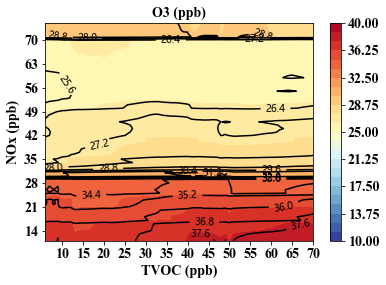

In [150]:
# 标准化
plotarray(O3, meshgrid_X, meshgrid_Y, 'TVOC (ppb)', 'NOx (ppb)', 'O3 (ppb)')#np.flip(O3)

In [152]:
# 测试
test_input = dict(X.mean())
test_input['NOx-氮氧化合物(μg/m³)'] = 43
test_input['TVOC'] = 34.
test_input = pd.DataFrame([test_input])
test_output = reg.predict(X_scaler.transform(test_input))
y_scaler.inverse_transform(test_output)

array([18.08063977])

## SHAP-EML

In [57]:
import shap
X_train_summary = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(model=reg.predict, data=X_train_summary, link="identity")
shap_values = explainer.shap_values(X_test, nsamples=100)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

  0%|          | 0/130 [00:00<?, ?it/s]

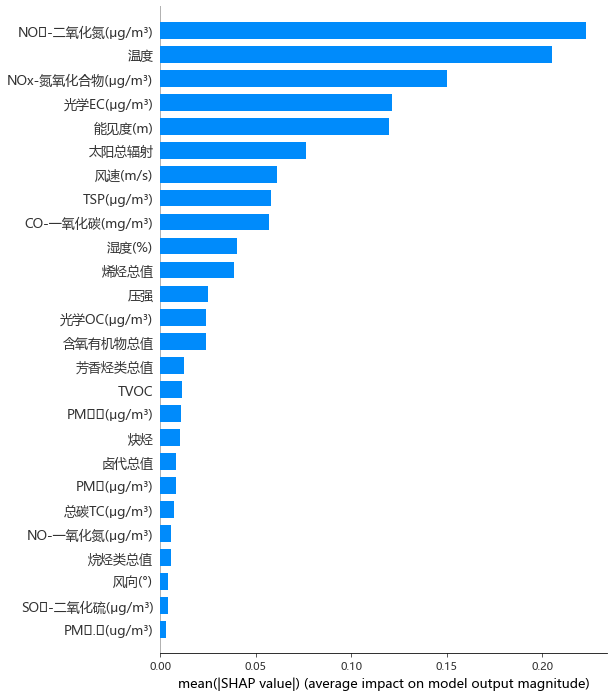

In [58]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=28, show=True)

In [59]:
import shap
X_train_summary = shap.sample(X_train, 10)
explainer = shap.KernelExplainer(model=reg.predict, data=X_train_summary)
shap_values = explainer.shap_values(X_train_summary)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test[:1])

  0%|          | 0/10 [00:00<?, ?it/s]

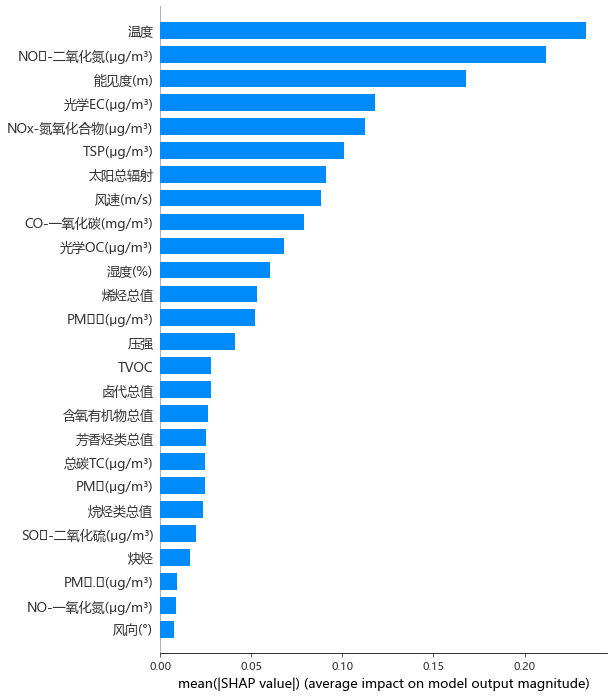

In [60]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar",max_display=28, show=True)

In [61]:
import shap
explainer = shap.KernelExplainer(model=reg.predict, data=X_train, link="identity")
shap_values = explainer.shap_values(X_test)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

Using 302 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/130 [00:00<?, ?it/s]

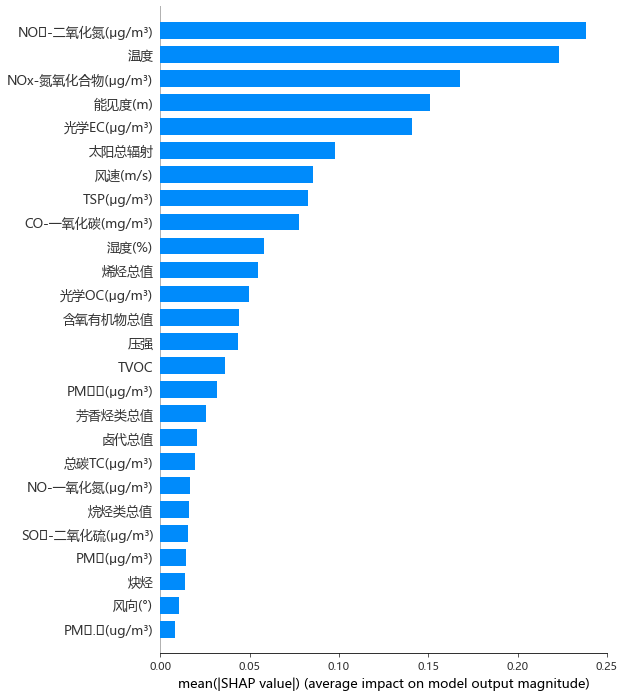

In [62]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=28, show=True)

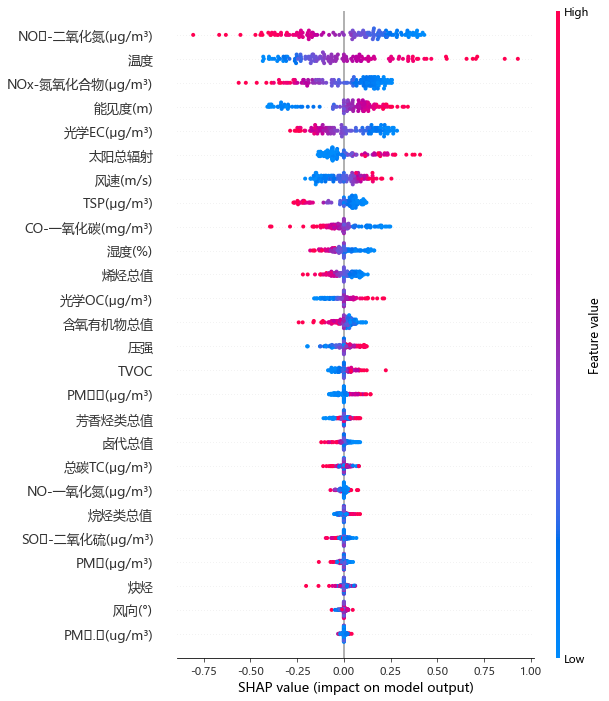

In [63]:
shap.initjs()
shap.summary_plot(shap_values, X_test, max_display=28, show=False)